This is a script for analysing the test RMSE of sample training vs training with all training data. Figure 3.4 report is produced using this script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xarray as xr

In [2]:
# Change paths for own use
ROOT = "ROOT/"
data_path = ROOT+"raw_data_EUPPBench/"
result_path = ROOT+"trained_models/lead_time_continuous/"

In [3]:
# Results df for training with all training data (100 trees and max depth of 5)
df_test_result = pd.read_csv(result_path + "results_giant_5_100_all_records.csv")
test_error_rf = df_test_result['error_rf']

# Results df for sample training (300 trees and max depth of 20)
df_test_result_sample = pd.read_csv(result_path + "results_giant_20_300.csv")
test_error_rf_sample = df_test_result_['error_rf']

# Load visibility observations
vis_forecast_obs = xr.open_dataarray(data_path + "vis_forecast_observations.nc")
lead = np.array(vis_forecast_obs['forecast_period'][1:])
lead_hr = np.array(lead*10**-9/3600, dtype='int')

/Users/clifflau/opt/anaconda3/lib/python3.8/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


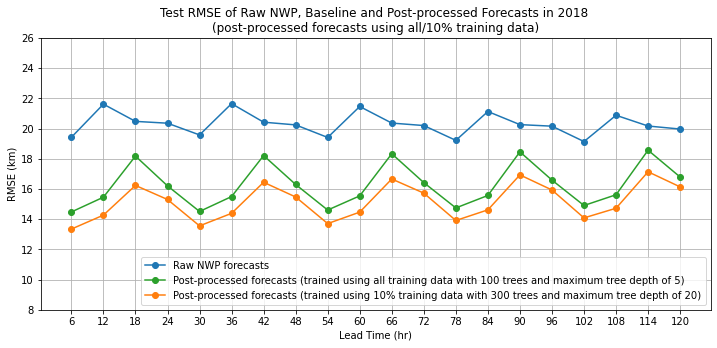

In [4]:
# Plot by lead time
rmse_rf = []
rmse_rf_sample = []
rmse_forecast = []
rmse_baseline = []

for l in lead_hr:
    df_result_lead = df_test_result_sample[df_test_result_sample['lead_hr']==l]
    rmse_rf.append(np.sqrt(np.mean(test_error_rf[df_test_result['lead_hr']==l]**2)))
    rmse_rf_sample.append(np.sqrt(np.mean(test_error_rf_sample[df_test_result_sample['lead_hr']==l]**2)))
    rmse_forecast.append(np.sqrt(np.mean(df_result_lead['error_nwp']**2)))
    rmse_baseline.append(np.sqrt(np.mean(df_test_result_sample[df_test_result_sample['lead_hr']==l]['error_baseline']**2)))

rmse_rf = np.array(rmse_rf)/1000
rmse_rf_sample = np.array(rmse_rf_sample)/1000
rmse_forecast = np.array(rmse_forecast)/1000
rmse_baseline = np.array(rmse_baseline)/1000

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(lead_hr, rmse_forecast, 'o-', label='Raw NWP forecasts')
ax1.plot(lead_hr, rmse_rf,'o-', label='Post-processed forecasts (trained using all training data with 100 trees and maximum tree depth of 5)', c='tab:green')
ax1.plot(lead_hr, rmse_rf_sample, 'o-', label='Post-processed forecasts (trained using 10% training data with 300 trees and maximum tree depth of 20)', c='tab:orange')
ax1.set_ylim(8,26)
plt.grid()
ax1.set_xticks(lead_hr)
ax1.set_xlabel("Lead Time (hr)")
ax1.set_ylabel("RMSE (km)")
ax1.set_title("Test RMSE of Raw NWP, Baseline and Post-processed Forecasts in 2018 \n(post-processed forecasts using all/10% training data)")
ax1.legend(loc='lower right')